In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

table = pd.read_csv("table.csv", sep = ";")
N = 28000
K = len(table["X9"])

le = LabelEncoder()
table["X22"].replace(np.nan, 0.0, inplace=True)
table["AMOUNT"].replace(np.nan, 0.0, inplace=True)
table.replace(np.nan, "nul", inplace=True)
le.fit(table.EVENT_TYPE_EX)
table["EVENT_TYPE_EX"] = le.transform(table.EVENT_TYPE_EX)
le.fit(table.X11)
table["X11"] = le.transform(table.X11)
le.fit(table.X12)
table["X12"] = le.transform(table.X12)
le.fit(table.X16)
table["X16"] = le.transform(table.X16)
le.fit(table.X24)
table["X24"] = le.transform(table.X24)
le.fit(table.X26)
table["X26"] = le.transform(table.X26)
dct = {"F": 1, "G": 0, "U":0}
table["CLASS1"] = table["CLASS"].map(dct)

X = np.array([table["EVENT_TYPE_EX"].values[0:N], table["AMOUNT"].values[0:N], table["X9"].values[0:N], 
              table["X10"].values[0:N], table["X11"].values[0:N], table["X12"].values[0:N], 
              table["X13"].values[0:N], table["X14"].values[0:N], table["X15"].values[0:N], 
              table["X16"].values[0:N], table["X17"].values[0:N], table["X18"].values[0:N], 
              table["X22"].values[0:N], table["X24"].values[0:N], table["X26"].values[0:N]])
X = X.transpose()
y = table["CLASS1"][0:N].values

P = np.array([table["EVENT_TYPE_EX"].values[N:K], table["AMOUNT"].values[N:K], table["X9"].values[N:K], 
              table["X10"].values[N:K], table["X11"].values[N:K], table["X12"].values[N:K], 
              table["X13"].values[N:K], table["X14"].values[N:K], table["X15"].values[N:K], 
              table["X16"].values[N:K], table["X17"].values[N:K], table["X18"].values[N:K], 
              table["X22"].values[N:K], table["X24"].values[N:K], table["X26"].values[N:K]])
P = P.transpose()

#table["p0_Fraud"] = table.apply(lambda row: predict(row), axis=1)
#print(table["p0_Fraud"].unique())


clf = RandomForestClassifier(n_estimators=1000, max_depth=10,
                             random_state=0)
clf.fit(X, y)  

print(clf.feature_importances_)

dct = {}
table["p0_Fraud"] = table["X26"].map(dct)

for i in range(N,K):
    p0 = clf.predict([P[i-N].tolist()])[0]
    table.loc[i, "p0_Fraud"] = p0
#print(table["p0_Fraud"][N:N+10])

[0.07484371 0.16488206 0.03210858 0.02203922 0.06361484 0.00105568
 0.02105487 0.02995554 0.25724688 0.0624994  0.12328523 0.02003473
 0.04465768 0.03690285 0.04581873]


In [22]:
def falsepos(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]=="G"):
            c1+=1
            if (table[rule][i]>=percent):
                c2+=1
    print("fp: "+str(c2/c1))

def falseneg(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]!="G"):
            c1+=1
            if (table[rule][i]<=percent):
                c2+=1
    print("fn: "+str(c2/c1))

def recall(rule,percent):
    fsfr=fslr=lsfr=0
    q=len(table[rule])
    for i in range(q):
        if (table[rule][i]>=percent):
            if (table["CLASS"][i]!="G"):
                fsfr+=1
            else:
                fslr+=1
        else:
            if (table["CLASS"][i]!="G"):
                lsfr+=1
    print("recall: "+str(fsfr/(fsfr+q*lsfr)))
    print("precicion: "+str(fsfr/(fsfr+q*fslr)))

rule="p0_Fraud"
print(rule+":")
falsepos(rule,0.5)
falseneg(rule,0.5)
recall(rule,0.5)
    

p0_Fraud:
fp: 0.00397406400334658
fn: 0.017976424361493125
recall: 8.133990253605769e-07
precicion: 0.00010640490162934189


0.008384486645356182
0.1002029697681871
0.3788344440518354
0.24521952782822354


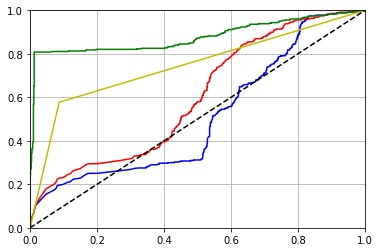

In [23]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y = np.array(table["CLASS"][N:K])
x1 = np.array(table["p1_Fraud"][N:K])
x2 = np.array(table["p2_Fraud"][N:K])
x3 = np.array(table["p3_Fraud"][N:K])
x0 = np.array(table["p0_Fraud"][N:K])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
fpr, tpr, thresholds = roc_curve(y,x0,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'y')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()